# Test de l'opérateur ProblemDiscontinuSautdTdt

In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

In [3]:
n_lim = 10**8
t_fin_lim = 1.

In [7]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte
delta conv :  -4558.720949672034
delta cond :  -316.70850215230234
delta * ... :  634666796.5293982
int_I... :  -3229333456.980092
int_I... + delta * ... :  -2594666660.450694
(int_I... + delta * ...)/rho_cp_a :  -8285.467071612351
int_div_lda_grad_T/rho_cp_a :  10.668550467250673
int_div_rhocp_T_u/rho_cp_a :  11463.802604783366
delta conv :  -4371.875687611325
delta cond :  297.02338987857075
delta * ... :  -658845746.11369
int_I... :  3230178137.640577
int_I... + delta * ... :  2571332391.526887
(int_I... + delta * ...)/rho_cp_a :  9092.448607845316
int_div_lda_grad_T/rho_cp_a :  16.11465258637245
int_div_rhocp_T_u/rho_cp_a :  -12068.418211072958
delta conv :  -4409.296555451646
delta cond :  -297.35060774350933
delta * ... :  590570128.2746142
int_I... :  -3228978068.7163987
int_I... + delta * ... :  -2638407940.4417844
(int_I... + delta * ...)/rho_cp_a :  -9074.363742309362
int_div_lda_grad_T/rho_cp_a :  17.275232360927244
int_di

<IPython.core.display.Javascript object>


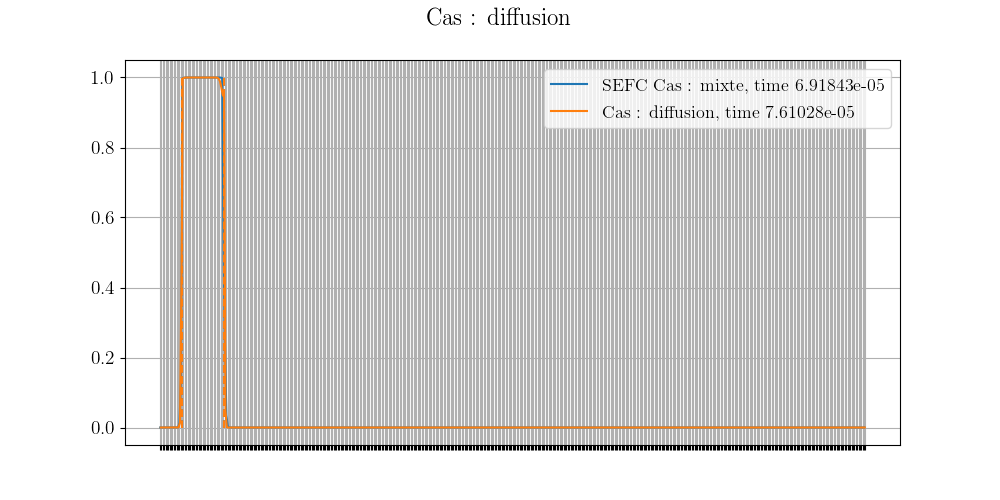

<IPython.core.display.Javascript object>


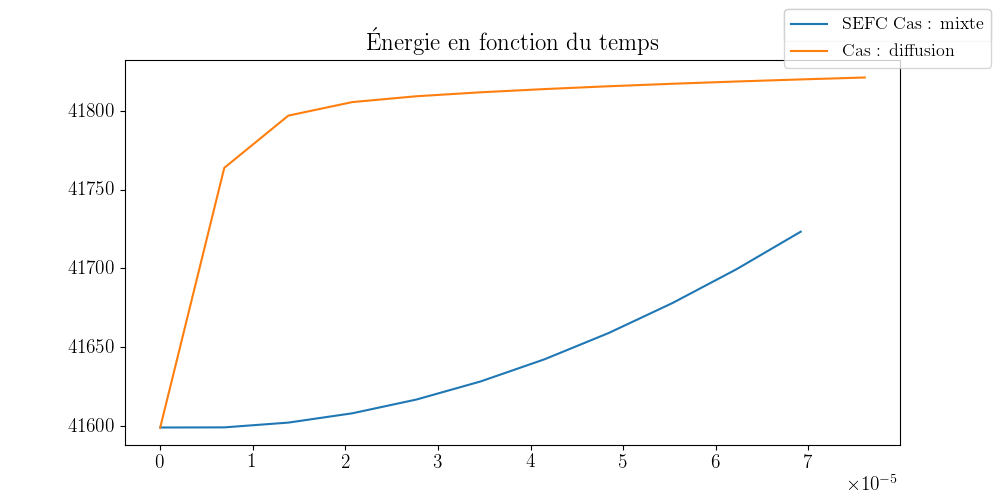

dE*/dt* = 0.000364188
dt fourier
6.918433404737903e-06
Cas : diffusion
plotter mode changed to decale
dE*/dt* ref = 6.46274e-05


In [5]:
t_fin = 0.2
n = 10
prob = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', deb=True)
E0 = prob.energy
print(prob.name)
print('==========================')
plot = Plotter('decale')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=min(n_lim, n), number_of_plots=1, plotter=plot)

fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* = %g' % dedt_adim)

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
plot.cas = 'decale'
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=min(n_lim, n), number_of_plots=1, plotter=plot)

l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
# par Dt / rho_cp_l T_l V
print('dE*/dt* ref = %g' % dedt_adim)

<IPython.core.display.Javascript object>


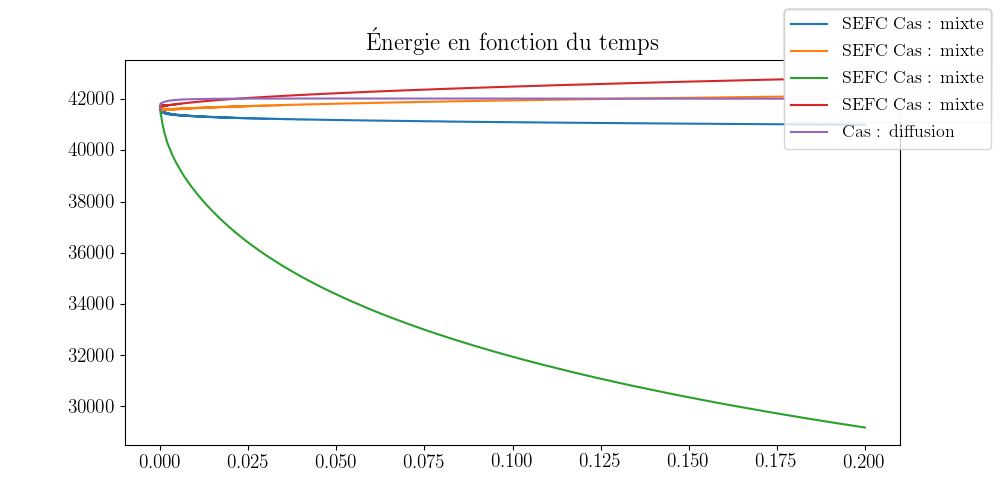

dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


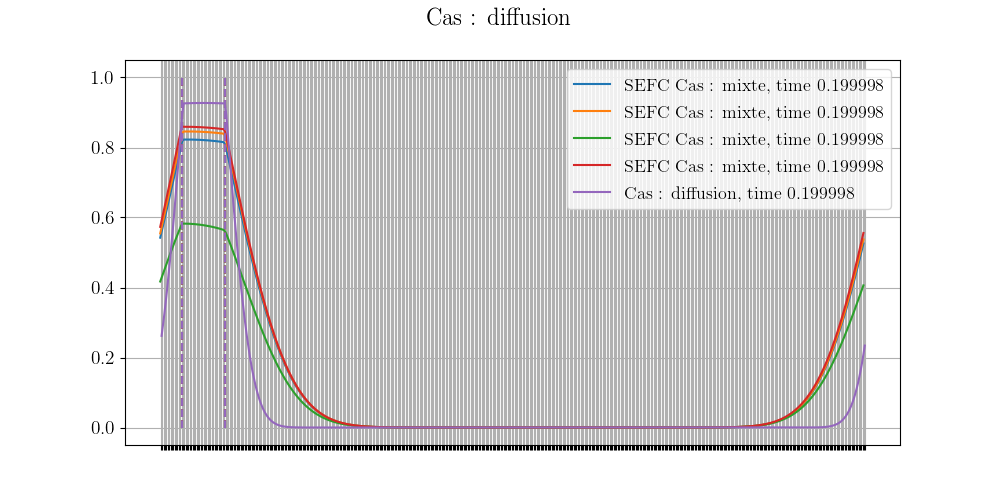

<IPython.core.display.Javascript object>


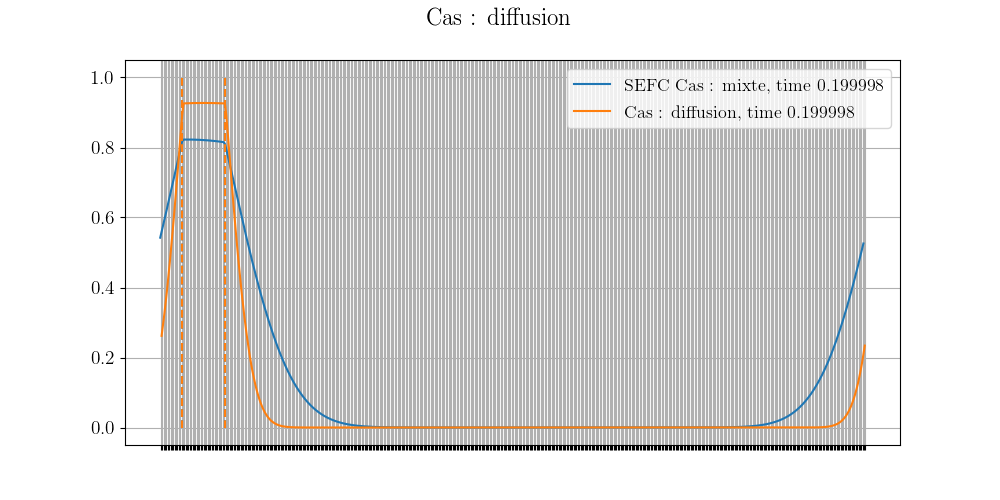

dE*/dt* = -2.16391e-07
dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


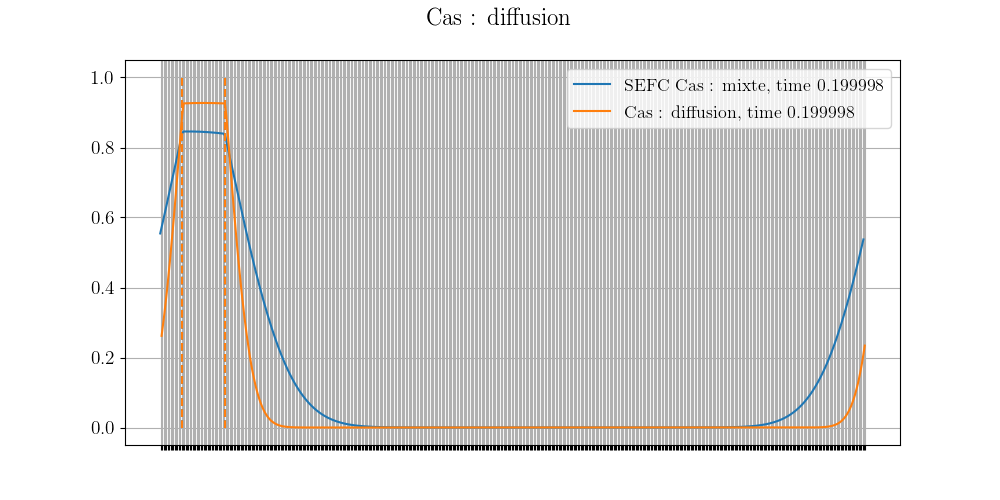

dE*/dt* = 3.63667e-07
dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


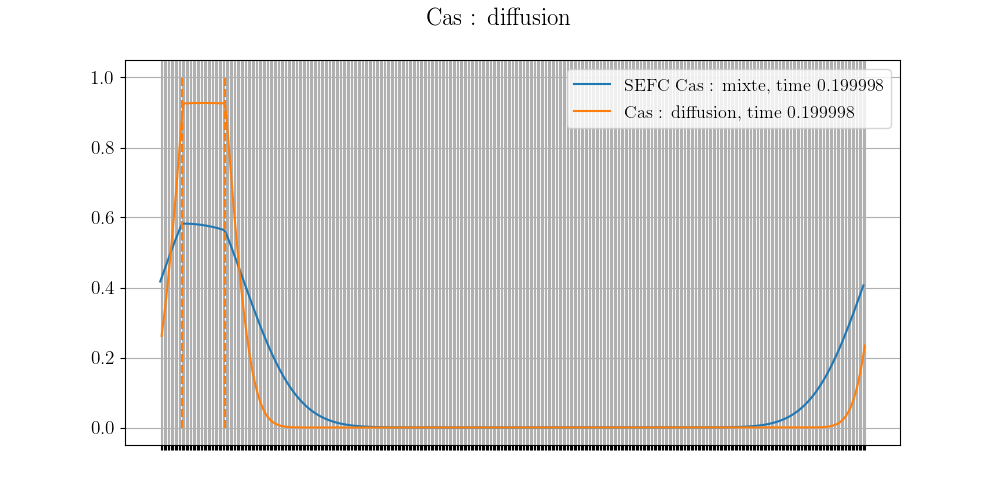

dE*/dt* = -6.13094e-06
dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


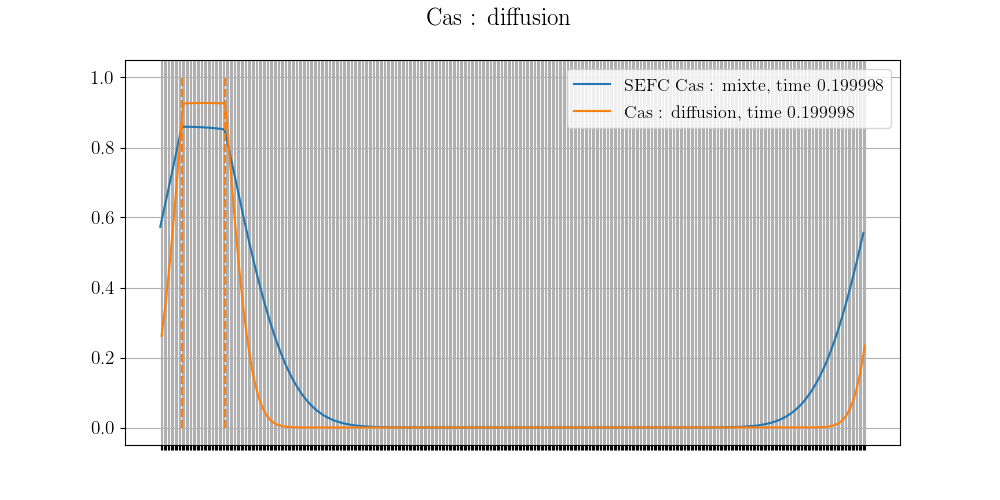

dE*/dt* = 7.08054e-07
dt fourier
6.918433404737903e-06
Cas : diffusion


<IPython.core.display.Javascript object>


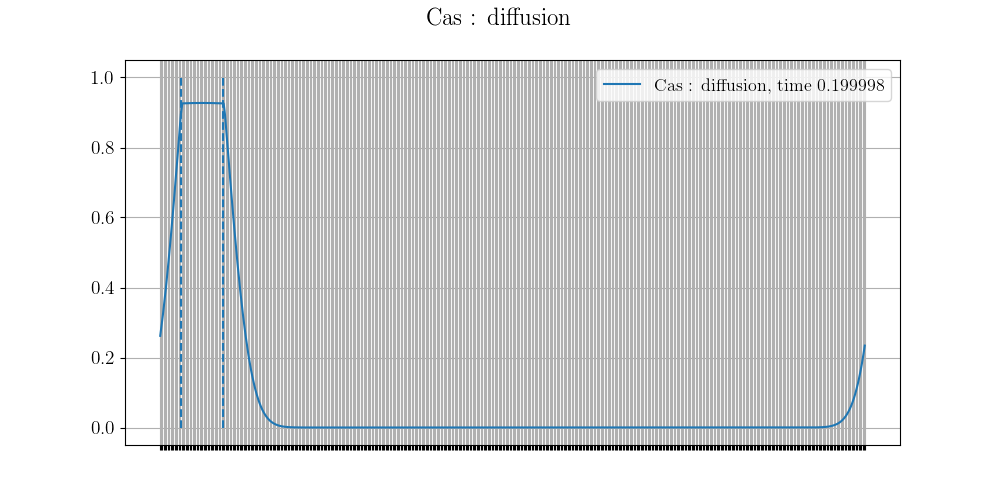

<IPython.core.display.Javascript object>


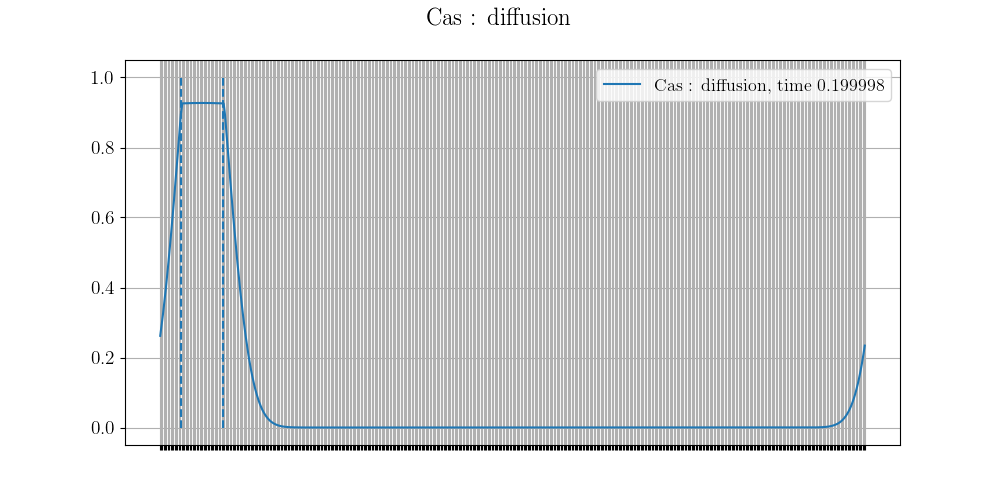

dE*/dt* ref = -1.14723e-08


In [8]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale')
plot1 = Plotter('decale')
plot2 = Plotter('decale')
plot3 = Plotter('decale')
plot4 = Plotter('decale')
plot5 = Plotter('decale')
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

prob = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob.energy
print(prob.name)
print('==========================')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob1 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', delta_diff=0.)
E0 = prob1.energy
print(prob1.name)
print('==========================')
t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob4 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', delta_conv=0.)
E0 = prob4.energy
print(prob4.name)
print('==========================')
t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob5 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', delta_conv=0., delta_diff=0., delta_conv2=1.)
E0 = prob5.energy
print(prob5.name)
print('==========================')
t, e = prob5.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

# perd de l'énergie
# prob2 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', delta_conv=0., delta_diff=0.)
# E0 = prob2.energy
# print(prob2.name)
# print('==========================')
# t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])
# 
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)
# le = fig1.legend()
# 
# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)

# divergent !!!
# prob3 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', int_Ti=0.)
# E0 = prob3.energy
# print(prob3.name)
# print('==========================')
# t, e = prob3.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot3])
# 
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob3.name)
# le = fig1.legend()
# 
# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob3.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)

# prob_init = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', delta_conv=0., delta_diff=0., int_Ti=0.)
# E0 = prob_init.energy
# print(prob_init.name)
# print('==========================')
# t, e = prob_init.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot)
# 
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob_init.name)
# le = fig1.legend()
# 
# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob_init.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2, plot3, plot4, plot5])

l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)
le = fig1.legend()

dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)

<IPython.core.display.Javascript object>


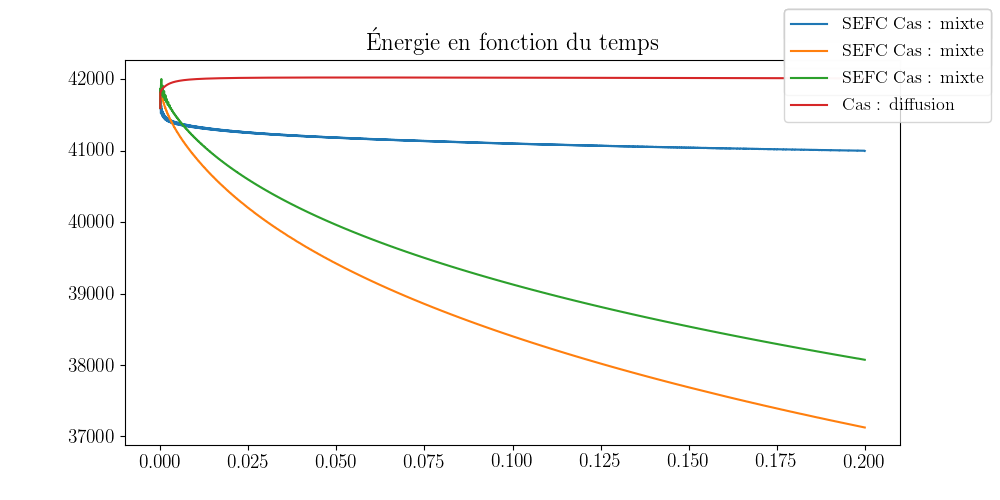

dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


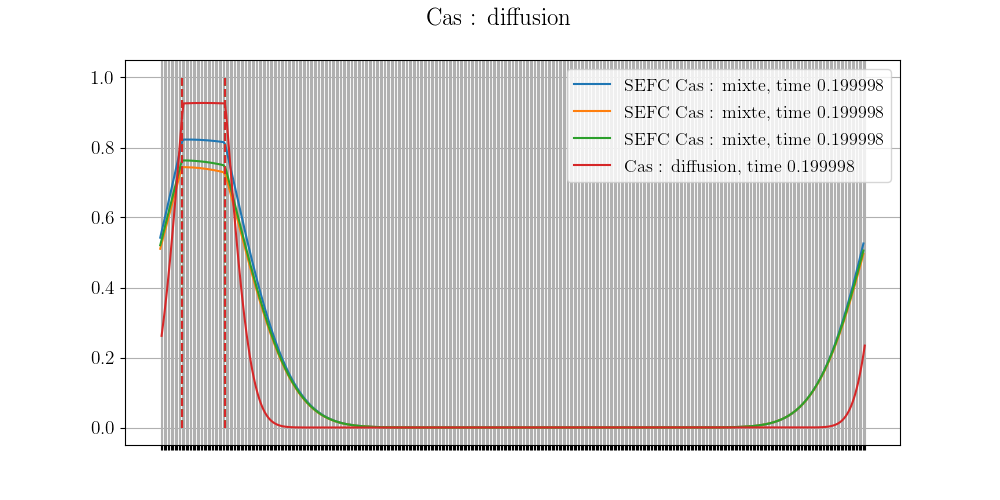

<IPython.core.display.Javascript object>


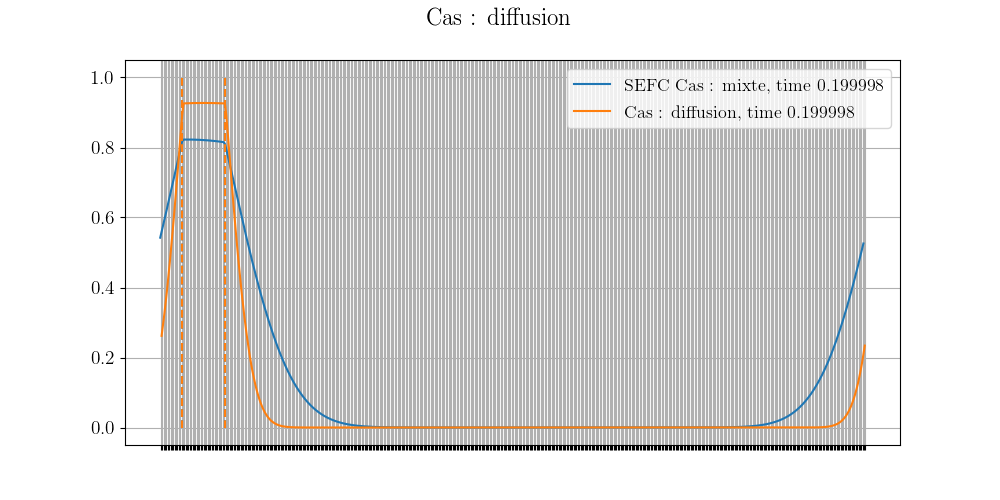

dE*/dt* = -2.16391e-07
dt fourier
6.918433404737903e-06
Ti2
SEFC Cas : mixte


<IPython.core.display.Javascript object>


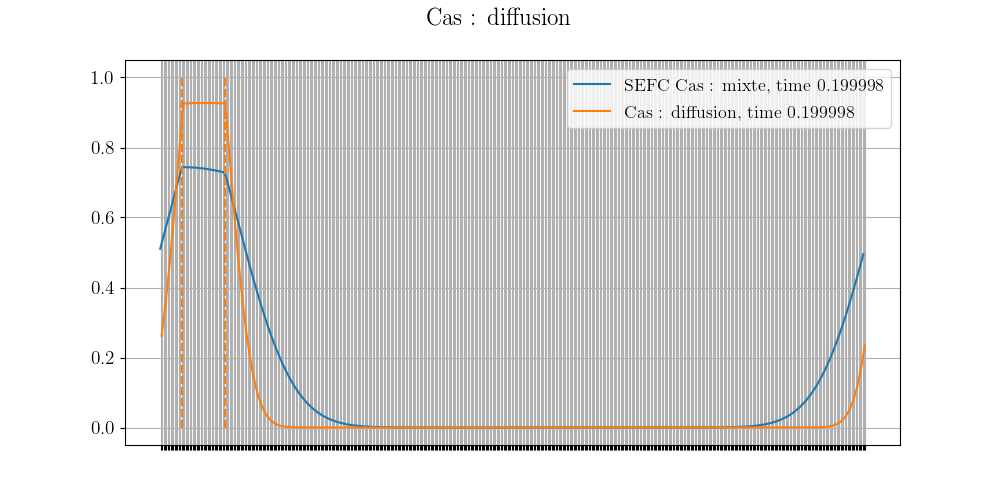

dE*/dt* = -2.67145e-06
dt fourier
6.918433404737903e-06
Ti3
SEFC Cas : mixte


<IPython.core.display.Javascript object>


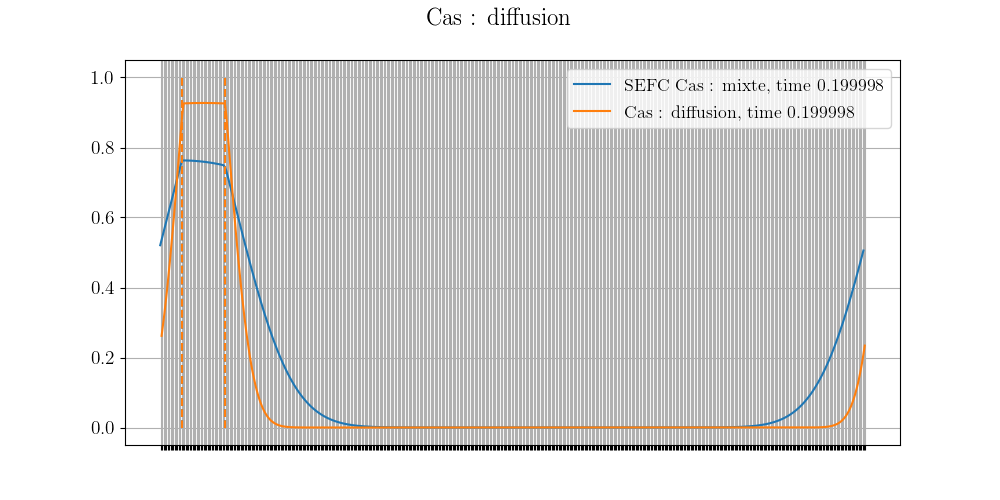

dE*/dt* = -2.19654e-06
dt fourier
6.918433404737903e-06
Cas : diffusion
dE*/dt* ref = -1.14723e-08


In [9]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale')
plot1 = Plotter('decale')
plot2 = Plotter('decale')
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

prob = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob.energy
print(prob.name)
print('==========================')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob1 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2')
E0 = prob1.energy
print(prob1.name)
print('==========================')
t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob2 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3')
E0 = prob2.energy
print(prob2.name)
print('==========================')
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2])

l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)
le = fig1.legend()

dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)

In [5]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

<IPython.core.display.Javascript object>


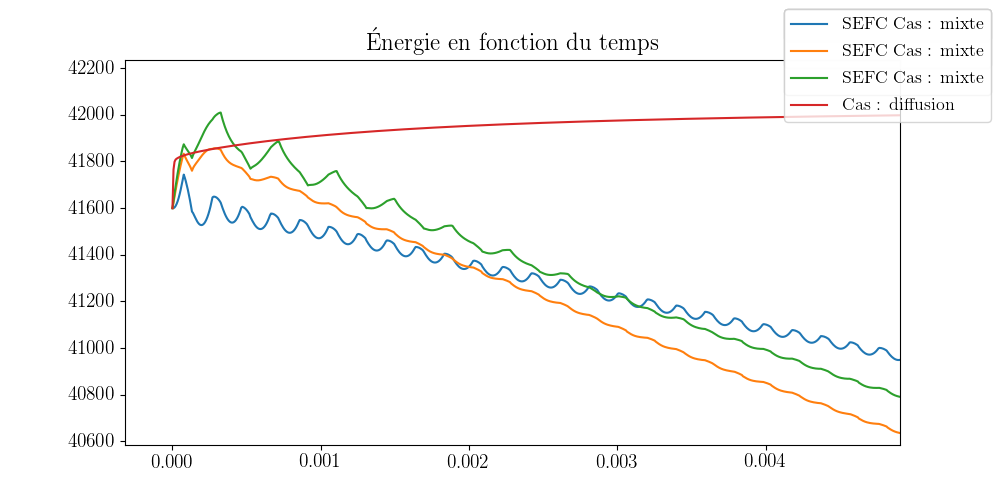

dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


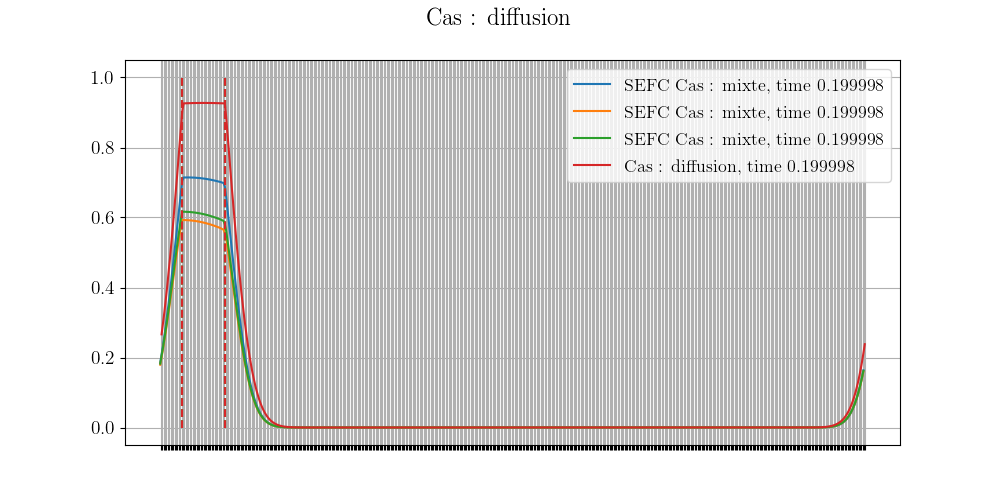

<IPython.core.display.Javascript object>


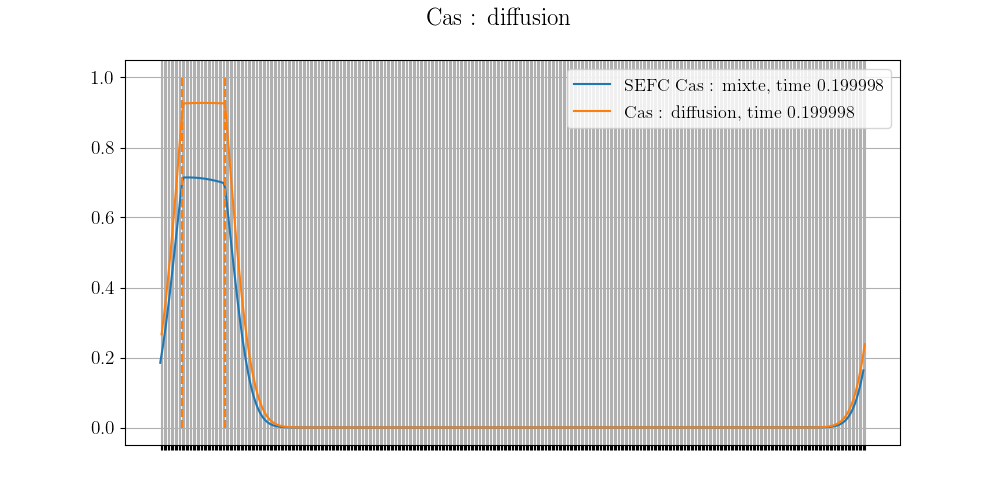

dE*/dt* = -6.07999e-06
dt fourier
6.918433404737903e-06
Ti2
SEFC Cas : mixte


<IPython.core.display.Javascript object>


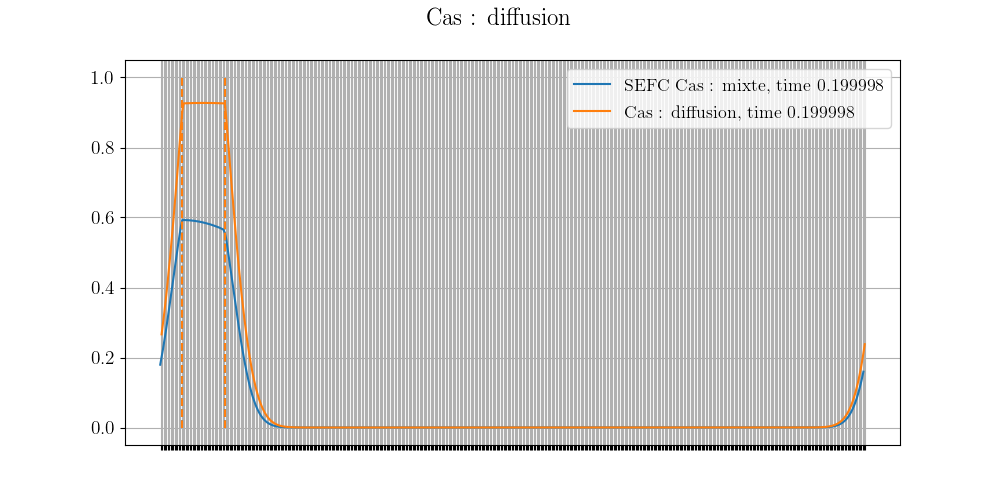

dE*/dt* = -9.34855e-06
dt fourier
6.918433404737903e-06
Ti3
SEFC Cas : mixte


<IPython.core.display.Javascript object>


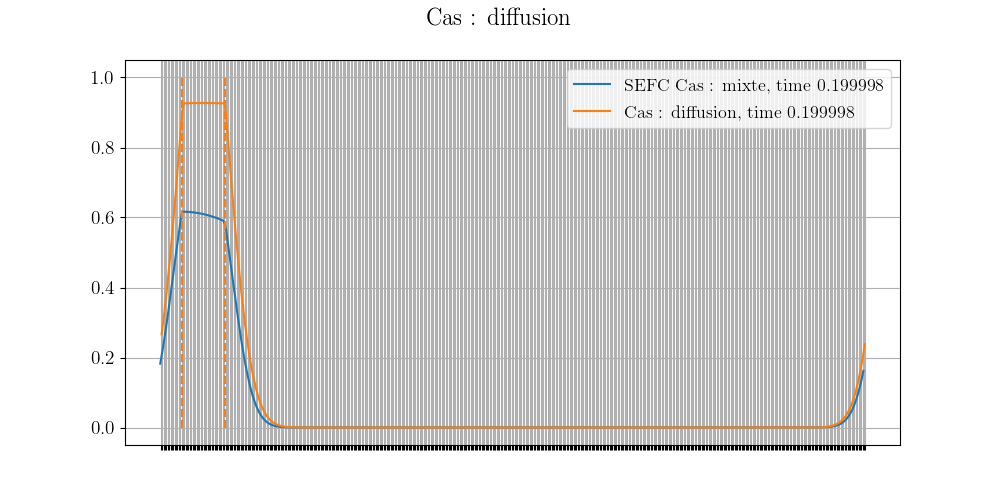

dE*/dt* = -8.78201e-06
dt fourier
6.918433404737903e-06
Cas : diffusion
dE*/dt* ref = -1.58104e-08


In [6]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale')
plot1 = Plotter('decale')
plot2 = Plotter('decale')
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

prob = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob.energy
print(prob.name)
print('==========================')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
le = fig1.legend()

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob1 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2')
E0 = prob1.energy
print(prob1.name)
print('==========================')
t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob2 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3')
E0 = prob2.energy
print(prob2.name)
print('==========================')
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2])

l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)
le = fig1.legend()

dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)